In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [2]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [3]:
NUM_CLASSES = 7

# Dataset reading

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [8]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 42)                0         
                                                                 
 dense (Dense)               (None, 20)                860       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 7)                 77        
                                                                 
Total params: 1,147
Trainable params: 1,147
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [10]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [11]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
 1/10 [==>...........................] - ETA: 11s - loss: 2.2283 - accuracy: 0.1016
Epoch 1: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
10/10 [==============================] - 2s 43ms/step - loss: 2.1402 - accuracy: 0.1276 - val_loss: 1.9793 - val_accuracy: 0.1667
Epoch 2/1000
 1/10 [==>...........................] - ETA: 0s - loss: 2.0657 - accuracy: 0.1250
Epoch 2: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
10/10 [==============================] - 0s 8ms/step - loss: 2.0240 - accuracy: 0.1410 - val_loss: 1.8905 - val_accuracy: 0.1948
Epoch 3/1000
 1/10 [==>...........................] - ETA: 0s - loss: 1.9220 - accuracy: 0.1875
Epoch 3: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
10/10 [==============================] - 0s 8ms/step - loss: 1.9550 - accuracy: 0.1629 - val_loss: 1.8238 - val_accuracy: 0.2183
Epoch 4/1000
 1/10 [==>...........................] - ETA: 0s - loss: 1.9368 - accuracy: 0.1953

 1/10 [==>...........................] - ETA: 0s - loss: 1.0474 - accuracy: 0.5859
Epoch 28: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
10/10 [==============================] - 0s 8ms/step - loss: 1.0581 - accuracy: 0.5865 - val_loss: 0.7901 - val_accuracy: 0.7911
Epoch 29/1000
 1/10 [==>...........................] - ETA: 0s - loss: 1.0601 - accuracy: 0.6250
Epoch 29: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
10/10 [==============================] - 0s 9ms/step - loss: 1.0559 - accuracy: 0.5920 - val_loss: 0.7737 - val_accuracy: 0.7840
Epoch 30/1000
 1/10 [==>...........................] - ETA: 0s - loss: 0.9072 - accuracy: 0.6484
Epoch 30: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
10/10 [==============================] - 0s 11ms/step - loss: 1.0203 - accuracy: 0.6061 - val_loss: 0.7590 - val_accuracy: 0.7934
Epoch 31/1000
 1/10 [==>...........................] - ETA: 0s - loss: 1.1306 - accuracy: 0.5391
Epoch 3

 1/10 [==>...........................] - ETA: 0s - loss: 0.7946 - accuracy: 0.6953
Epoch 55: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
10/10 [==============================] - 0s 7ms/step - loss: 0.8071 - accuracy: 0.6907 - val_loss: 0.4986 - val_accuracy: 0.8920
Epoch 56/1000
 1/10 [==>...........................] - ETA: 0s - loss: 0.7549 - accuracy: 0.7266
Epoch 56: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
10/10 [==============================] - 0s 8ms/step - loss: 0.7864 - accuracy: 0.7024 - val_loss: 0.4891 - val_accuracy: 0.8920
Epoch 57/1000
 1/10 [==>...........................] - ETA: 0s - loss: 0.6789 - accuracy: 0.8047
Epoch 57: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
10/10 [==============================] - 0s 9ms/step - loss: 0.7878 - accuracy: 0.7001 - val_loss: 0.4861 - val_accuracy: 0.8991
Epoch 58/1000
 1/10 [==>...........................] - ETA: 0s - loss: 0.6751 - accuracy: 0.7500
Epoch 58

 1/10 [==>...........................] - ETA: 0s - loss: 0.6503 - accuracy: 0.7812
Epoch 82: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
10/10 [==============================] - 0s 8ms/step - loss: 0.6990 - accuracy: 0.7447 - val_loss: 0.3723 - val_accuracy: 0.9202
Epoch 83/1000
 1/10 [==>...........................] - ETA: 0s - loss: 0.7440 - accuracy: 0.7031
Epoch 83: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
10/10 [==============================] - 0s 8ms/step - loss: 0.6410 - accuracy: 0.7565 - val_loss: 0.3693 - val_accuracy: 0.9319
Epoch 84/1000
 1/10 [==>...........................] - ETA: 0s - loss: 0.7267 - accuracy: 0.7109
Epoch 84: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
10/10 [==============================] - 0s 9ms/step - loss: 0.6720 - accuracy: 0.7455 - val_loss: 0.3620 - val_accuracy: 0.9343
Epoch 85/1000
 1/10 [==>...........................] - ETA: 0s - loss: 0.6167 - accuracy: 0.7812
Epoch 85

Epoch 109/1000
 1/10 [==>...........................] - ETA: 0s - loss: 0.5942 - accuracy: 0.8125
Epoch 109: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
10/10 [==============================] - 0s 13ms/step - loss: 0.6322 - accuracy: 0.7729 - val_loss: 0.3112 - val_accuracy: 0.9296
Epoch 110/1000
 1/10 [==>...........................] - ETA: 0s - loss: 0.5854 - accuracy: 0.7266
Epoch 110: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
10/10 [==============================] - 0s 13ms/step - loss: 0.6244 - accuracy: 0.7643 - val_loss: 0.3062 - val_accuracy: 0.9343
Epoch 111/1000
 1/10 [==>...........................] - ETA: 0s - loss: 0.6130 - accuracy: 0.8047
Epoch 111: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
10/10 [==============================] - 0s 13ms/step - loss: 0.6247 - accuracy: 0.7635 - val_loss: 0.3057 - val_accuracy: 0.9366
Epoch 112/1000
 6/10 [=================>............] - ETA: 0s - loss: 0.6560 - a

Epoch 136/1000
 1/10 [==>...........................] - ETA: 0s - loss: 0.5393 - accuracy: 0.7891
Epoch 136: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
10/10 [==============================] - 0s 10ms/step - loss: 0.5988 - accuracy: 0.7784 - val_loss: 0.2735 - val_accuracy: 0.9390
Epoch 137/1000
 1/10 [==>...........................] - ETA: 0s - loss: 0.4956 - accuracy: 0.7891
Epoch 137: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
10/10 [==============================] - 0s 9ms/step - loss: 0.5644 - accuracy: 0.7847 - val_loss: 0.2702 - val_accuracy: 0.9413
Epoch 138/1000
 1/10 [==>...........................] - ETA: 0s - loss: 0.4985 - accuracy: 0.8125
Epoch 138: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
10/10 [==============================] - 0s 10ms/step - loss: 0.6189 - accuracy: 0.7596 - val_loss: 0.2729 - val_accuracy: 0.9390
Epoch 139/1000
 1/10 [==>...........................] - ETA: 0s - loss: 0.6439 - ac

Epoch 163/1000
 1/10 [==>...........................] - ETA: 0s - loss: 0.6981 - accuracy: 0.7109
Epoch 163: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
10/10 [==============================] - 0s 8ms/step - loss: 0.5971 - accuracy: 0.7745 - val_loss: 0.2522 - val_accuracy: 0.9390
Epoch 164/1000
 1/10 [==>...........................] - ETA: 0s - loss: 0.5109 - accuracy: 0.7578
Epoch 164: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
10/10 [==============================] - 0s 9ms/step - loss: 0.6008 - accuracy: 0.7878 - val_loss: 0.2561 - val_accuracy: 0.9437
Epoch 165/1000
 1/10 [==>...........................] - ETA: 0s - loss: 0.5058 - accuracy: 0.8438
Epoch 165: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
10/10 [==============================] - 0s 9ms/step - loss: 0.5562 - accuracy: 0.7995 - val_loss: 0.2499 - val_accuracy: 0.9460
Epoch 166/1000
 1/10 [==>...........................] - ETA: 0s - loss: 0.5991 - accu

Epoch 190/1000
 1/10 [==>...........................] - ETA: 0s - loss: 0.5064 - accuracy: 0.8438
Epoch 190: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
10/10 [==============================] - 0s 9ms/step - loss: 0.5658 - accuracy: 0.7933 - val_loss: 0.2418 - val_accuracy: 0.9437
Epoch 191/1000
 1/10 [==>...........................] - ETA: 0s - loss: 0.5117 - accuracy: 0.7812
Epoch 191: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
10/10 [==============================] - 0s 11ms/step - loss: 0.5632 - accuracy: 0.7768 - val_loss: 0.2399 - val_accuracy: 0.9460
Epoch 192/1000
 1/10 [==>...........................] - ETA: 0s - loss: 0.4858 - accuracy: 0.8359
Epoch 192: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
10/10 [==============================] - 0s 8ms/step - loss: 0.5529 - accuracy: 0.7815 - val_loss: 0.2414 - val_accuracy: 0.9437
Epoch 193/1000
 1/10 [==>...........................] - ETA: 0s - loss: 0.6190 - acc

Epoch 217/1000
 1/10 [==>...........................] - ETA: 0s - loss: 0.5681 - accuracy: 0.7891
Epoch 217: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
10/10 [==============================] - 0s 10ms/step - loss: 0.5546 - accuracy: 0.7940 - val_loss: 0.2212 - val_accuracy: 0.9460
Epoch 218/1000
 1/10 [==>...........................] - ETA: 0s - loss: 0.4952 - accuracy: 0.8359
Epoch 218: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
10/10 [==============================] - 0s 9ms/step - loss: 0.5422 - accuracy: 0.8113 - val_loss: 0.2223 - val_accuracy: 0.9460
Epoch 219/1000
 1/10 [==>...........................] - ETA: 0s - loss: 0.6253 - accuracy: 0.7500
Epoch 219: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
10/10 [==============================] - 0s 10ms/step - loss: 0.5408 - accuracy: 0.7940 - val_loss: 0.2258 - val_accuracy: 0.9390
Epoch 220/1000
 1/10 [==>...........................] - ETA: 0s - loss: 0.4777 - ac

Epoch 244/1000
 1/10 [==>...........................] - ETA: 0s - loss: 0.4273 - accuracy: 0.8281
Epoch 244: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
10/10 [==============================] - 0s 8ms/step - loss: 0.5072 - accuracy: 0.8152 - val_loss: 0.2141 - val_accuracy: 0.9413
Epoch 245/1000
 1/10 [==>...........................] - ETA: 0s - loss: 0.5588 - accuracy: 0.7891
Epoch 245: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
10/10 [==============================] - 0s 8ms/step - loss: 0.5538 - accuracy: 0.7933 - val_loss: 0.2118 - val_accuracy: 0.9437
Epoch 246/1000
 1/10 [==>...........................] - ETA: 0s - loss: 0.4813 - accuracy: 0.8125
Epoch 246: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
10/10 [==============================] - 0s 10ms/step - loss: 0.5152 - accuracy: 0.8074 - val_loss: 0.2125 - val_accuracy: 0.9437
Epoch 247/1000
 1/10 [==>...........................] - ETA: 0s - loss: 0.5079 - acc

Epoch 271/1000
 1/10 [==>...........................] - ETA: 0s - loss: 0.5754 - accuracy: 0.8281
Epoch 271: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
10/10 [==============================] - 0s 8ms/step - loss: 0.5276 - accuracy: 0.7964 - val_loss: 0.2102 - val_accuracy: 0.9390
Epoch 272/1000
 1/10 [==>...........................] - ETA: 0s - loss: 0.4164 - accuracy: 0.8438
Epoch 272: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
10/10 [==============================] - 0s 8ms/step - loss: 0.4925 - accuracy: 0.8097 - val_loss: 0.2101 - val_accuracy: 0.9437
Epoch 273/1000
 1/10 [==>...........................] - ETA: 0s - loss: 0.3975 - accuracy: 0.8516
Epoch 273: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
10/10 [==============================] - 0s 12ms/step - loss: 0.4915 - accuracy: 0.8136 - val_loss: 0.2041 - val_accuracy: 0.9460
Epoch 274/1000
 1/10 [==>...........................] - ETA: 0s - loss: 0.5918 - acc

Epoch 298/1000
 1/10 [==>...........................] - ETA: 0s - loss: 0.4647 - accuracy: 0.8516
Epoch 298: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
10/10 [==============================] - 0s 9ms/step - loss: 0.4872 - accuracy: 0.8254 - val_loss: 0.1904 - val_accuracy: 0.9507
Epoch 299/1000
 1/10 [==>...........................] - ETA: 0s - loss: 0.3985 - accuracy: 0.8906
Epoch 299: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
10/10 [==============================] - 0s 10ms/step - loss: 0.5138 - accuracy: 0.8183 - val_loss: 0.1930 - val_accuracy: 0.9460
Epoch 300/1000
 1/10 [==>...........................] - ETA: 0s - loss: 0.4417 - accuracy: 0.8359
Epoch 300: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
10/10 [==============================] - 0s 9ms/step - loss: 0.5115 - accuracy: 0.8121 - val_loss: 0.1933 - val_accuracy: 0.9507
Epoch 301/1000
 1/10 [==>...........................] - ETA: 0s - loss: 0.5413 - acc

Epoch 325/1000
 1/10 [==>...........................] - ETA: 0s - loss: 0.4863 - accuracy: 0.8438
Epoch 325: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
10/10 [==============================] - 0s 9ms/step - loss: 0.5022 - accuracy: 0.8128 - val_loss: 0.1891 - val_accuracy: 0.9531
Epoch 325: early stopping


In [12]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

4/4 [==============================] - 0s 2ms/step - loss: 0.1891 - accuracy: 0.9531


In [13]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [14]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 169ms/step
[6.7638922e-07 4.8115755e-08 1.2647556e-05 2.7957230e-05 9.9983311e-01
 4.1998094e-10 1.2553710e-04]
4


# Confusion matrix

14/14 [==============================] - 0s 1ms/step


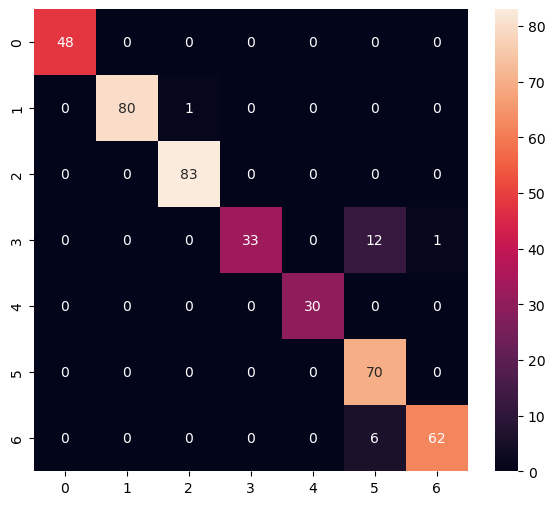

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        48
           1       1.00      0.99      0.99        81
           2       0.99      1.00      0.99        83
           3       1.00      0.72      0.84        46
           4       1.00      1.00      1.00        30
           5       0.80      1.00      0.89        70
           6       0.98      0.91      0.95        68

    accuracy                           0.95       426
   macro avg       0.97      0.95      0.95       426
weighted avg       0.96      0.95      0.95       426



In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [16]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [17]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\jasha\AppData\Local\Temp\tmpr65tkrus\assets


INFO:tensorflow:Assets written to: C:\Users\jasha\AppData\Local\Temp\tmpr65tkrus\assets


6676

# Inference test

In [18]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [19]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [20]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [21]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 0 ns


In [22]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[6.7638848e-07 4.8115663e-08 1.2647554e-05 2.7957229e-05 9.9983311e-01
 4.1998094e-10 1.2553710e-04]
4
